|<img src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif"> |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|

### Section 2.3, écoulement d'un film de fluide Newtonien dans une conduite

>  Le développement fait dans Transport Phenomena sera répété ici en développant les solutions avec le calculateur formel sympy et en traçant la solution avec sympy.plot. Nous n'irons pas ici autant dans le détail que dans la section 2.2, Les coordonnées cylindriques sont utilisées, évidemment. Remarquez bien comment la courbure de la géométrie a un effet sur le bilan. <img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-2-Section-2-3.png'>

>Vous pouvez suivre le développement détaillé à l'aide du livre et voir comment les équations de bilans initiales deviennent les profils de vitesse, de force, débit, etc...


In [2]:
#
# Pierre Proulx
#
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp          
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline

In [3]:
# Paramètres, variables et fonctions
#
r,delta_r,L,rho,g,mu,R,P_0,P_L=sp.symbols('r,delta_r,L,rho,g,mu,R,P_0,P_L')
C1=sp.symbols('C1')
phi_rz,phi_zz=sp.symbols('phi_rz,phi_zz')

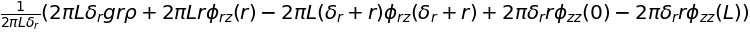

In [4]:
#
# Équation du bilan des forces
#
eq=2*sp.pi*r*L*phi_rz(r)      -2*sp.pi*(r+delta_r)*L*phi_rz(r+delta_r)
eq=eq+2*sp.pi*delta_r*r*phi_zz(0)-2*sp.pi*r*delta_r*phi_zz(L)
eq=eq+2*sp.pi*r*delta_r*L*rho*g
#eq=r*phi_rz(r)/delta_r-(r+delta_r)*phi_rz(r+delta_r)/delta_r+r*P_0/L-r*P_L/L 
#
# pose de la limite quand dr tends vers 0
#
eq=eq/(2*sp.pi*L*delta_r)
display(eq)

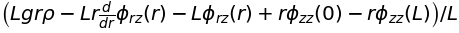

In [5]:
eq1=sp.limit(eq,delta_r,0).doit()
display(eq1)

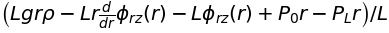

In [6]:
eq1=eq1.subs(phi_zz(0),P_0)     # les termes de convection s'annulent comme en 2.2
eq1=eq1.subs(phi_zz(L),P_L)     # mais il reste le terme de pression
display(eq1)

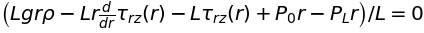

In [7]:
# Loi de Newton, le terme phi ne contient que le cisaillement, pas de vitesse radiale.
tau=sp.symbols('tau_rz')
eq2=sp.Eq(eq1.subs(phi_rz(r),tau(r)))
display(eq2)

In [8]:
eq2=sp.dsolve(eq2)
display(eq2)

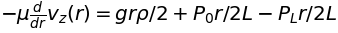

In [9]:
vz=sp.Function('v_z')(r)
newton=-mu*sp.Derivative(vz,r)
eq3=eq2.subs(tau(r),newton)
eq3=eq3.subs(C1,0)               # C1 doit être nulle sinon on a une force infinie en r=0
display(eq3)

In [10]:
eq4=sp.dsolve(eq3,vz)      # rhs pour avoir la droite de l'équation vz=...
display(eq4)

In [11]:
constante=sp.solve(sp.Eq(eq4.rhs.subs(r,R),0),'C1',dict=True)   # Condition de non-glissement à la paroi
display(constante)
constante=constante[0]     

vitesse en fonction de r


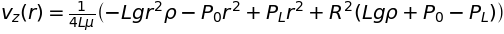

In [12]:
vz=eq4.subs(constante)
print('vitesse en fonction de r')
display(vz.simplify())

Force


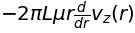

'évalué en r=R devient'

In [13]:
print('Force')
#
# collect et simplify simplifient l'expression, c'est purement cosmétique.
#
display(-mu*vz.lhs.diff(r)*2*sp.pi*r*L)
display('évalué en r=R devient')
display(-mu*vz.rhs.diff(r).subs(r,R)*2*sp.pi*R*L)

débit et vitesse moyenne


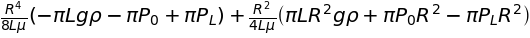

In [14]:
print( 'débit et vitesse moyenne')
vz=vz.rhs # On enlève le terme de gauche et à partir d'ici on travaille seulement avec la partie droite
debit=sp.integrate(2*sp.pi*vz*r,(r,0,R))
display(debit)

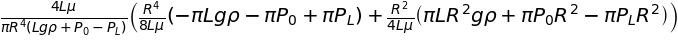

In [15]:
vmax=vz.subs(r,0)
display(debit/(sp.pi*R**2)/vmax)   # ce calcul donne quoi?

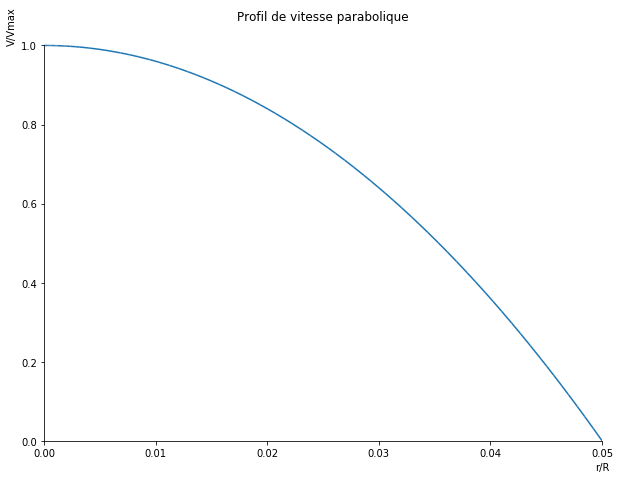

In [16]:
# Maintenant traçons le profil en donnant des valeurs de paramètres réalistes
#
dico={'rho':1000, 'mu':0.001, 'R':0.05, 'L':100,'P_0':200,'P_L':0,'g':9.81}
vz=vz.subs(dico)
vzmax=vz.subs(r,0)
display(vz,vzmax)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,8
sp.plot(vz.subs(dico)/vzmax,(r,0,R.subs(dico)),title='Profil de vitesse parabolique',
       ylabel='V/Vmax',xlabel='r/R');